In [5]:
import os
import sys
from pathlib import Path
rootFolder = str(Path(os.path.abspath("")).parent)
sys.path.append(rootFolder)

# %matplotlib inline
import numpy as np
from cell_plotting import load_cell_netpyne
from extracellular_stim_tools.netpyne_extracellular import flattenLL, calculate_segments_pts, get_section_list_NetPyNE, SingleExtracellular
import matplotlib.pyplot as plt
%matplotlib ipympl

import pyvista as pv
from pyvista.plotting.plotter import Plotter

In [6]:
cell_name_ID = "L5_LBC_cNAC_1"

tms_params = dict(
    # Coupling params
    decay_rate_percent_per_mm=0,            # Rate of decay that the field diminishes by over space (uniform field at 0)
    E_field_dir={"Coord_type": "Spherical",
                 "Polar": 90.,
                 "Azimuthal": 0.,},                         # Empty because it will be populated and iterated over in cell_type_threshold_map
    decay_dir={"Coord_type": "Spherical",   # Direction over which the field decays (meaningless when decay is 0)
                "Polar": 180,
                "Azimuthal": 0,},
    somatodendritic_axis=[0, 1, 0],         # Defines the direction that Polar=0 points in
    # Waveform params
    stim_type="sTMS",                       # Single-pulse TMS
    efield_amplitude_V_per_m = 230.,
    stim_start_ms=0,                        # When to apply the pulse
    num_pulses_per_burst=1,                 # Number of pulses in a burst (useful for theta burst stimulation)
    tms_pulse_width_ms=0.075,
    tms_pulse_shape="Monophasic",
    # Simulation params
    simulation_duration_ms=5,
    default_dt = 0.005,                     # Time step when outside of any pulses
    # pulse_dt = 0.005,
    # num_time_steps_in_pulse_width = 15,           # Number of time steps to spend on each pulse (such that pulse_dt = tms_pulse_width / num_time_steps_in_pulse)
    # Plotting quasipotentials
    plot=False,
)


In [7]:

cell = load_cell_netpyne(cell_name_ID)
ecs = SingleExtracellular(cell=cell, v_recording=True, **tms_params)
ecs.run_simulation()



Creating network of 1 cell populations on 1 hosts...: 100%|##########|


Applying extracellular stim (sTMS) to cell...

Running with interval func using NEURON for 5 ms...
  Done; run time = 2.00 s; real-time ratio: 0.00.

Gathering data...
  Done; gather time = 0.08 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.0 s; 1 workers
  Run time: 2.00 s


compartCell_L5_LBC_cNAC_1_HH_full_0.soma_0


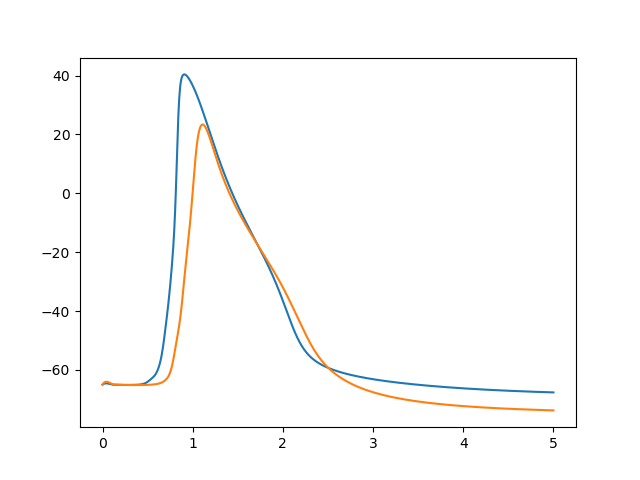

In [8]:
print(ecs.stim_cell.section_list[0])
soma_v = list(ecs.voltages[0][0])
time = np.linspace(0, tms_params['simulation_duration_ms'], len(soma_v))
plt.plot(time, soma_v)
plt.show()